In [85]:
# IMPORTS

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk

In [86]:
# DATA IMPORTS 

dataset = pd.read_csv('s3://rmit-ml-2020s1-lab-data/Assignment1_data/train.csv')
test = pd.read_csv('s3://rmit-ml-2020s1-lab-data/Assignment1_data/test.csv')
sample_solution = pd.read_csv('s3://rmit-ml-2020s1-lab-data/Assignment1_data/sample_solution.csv')

In [129]:
# NORMALIZATION OF DATASET 

normalized_dataset = dataset
normalized_dataset = (normalized_dataset - normalized_dataset.mean()) / (normalized_dataset.max() - normalized_dataset.min())
normalized_dataset = normalized_dataset.drop(columns='ID')

# list(normalized_dataset.columns.values) 
#normalized_dataset

Mean squared error 0.006920664617494395


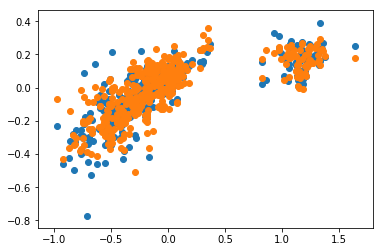

In [127]:
# APPLICATION OF LINEAR REGRESSION 

from sklearn import linear_model
from sklearn.model_selection import train_test_split


X = normalized_dataset[['Country',
'Year',
'Status',
'AdultMortality',
'AdultMortality-Male',
'AdultMortality-Female',
'InfantDeaths',
'Alcohol',
'PercentageExpenditure',
'Measles',
'BMI',
'UnderFiveDeaths',
'Polio',
'TotalExpenditure',
'Diphtheria',
'HIV-AIDS',
'GDP',
'Population',
'Thinness1-19years',
'Thinness5-9years',
'IncomeCompositionOfResources',
'Schooling']]

Y = normalized_dataset.TARGET_LifeExpectancy

trainX, testX, trainY, testY = train_test_split(np.array(X), np.array(Y), test_size=0.2)

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
polyFeat = PolynomialFeatures(degree=2)
polyTrainX = polyFeat.fit_transform(trainX)
polyTestX = polyFeat.fit_transform(testX)
poly_model = linReg.fit(polyTrainX, trainY)
poly_prediction = poly_model.predict(polyTestX)

# print(polyTestX.shape)
# print(poly_prediction.shape)

# Mean squared error
from sklearn.metrics import mean_squared_error
print('Mean squared error', mean_squared_error(testY, poly_prediction))


# Reduce the dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca_data = pca.fit_transform(polyTestX)
pca_df = pd.DataFrame(data=pca_data, columns=['polyTestX'])

#prediction
pca_df['predict'] = poly_prediction
plt.scatter(pca_df['polyTestX'], pca_df['predict'])

#test
pca_df['testY'] = testY
plt.scatter(pca_df['polyTestX'], pca_df['testY'])

